## T-test analysis

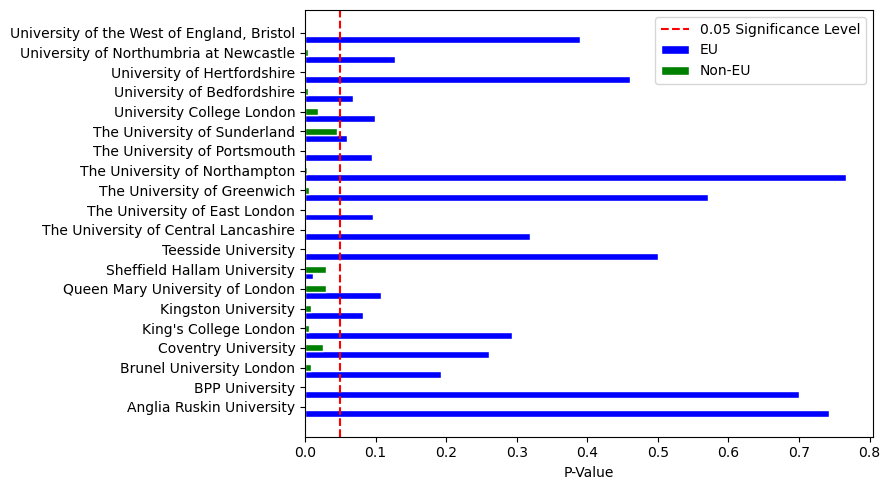

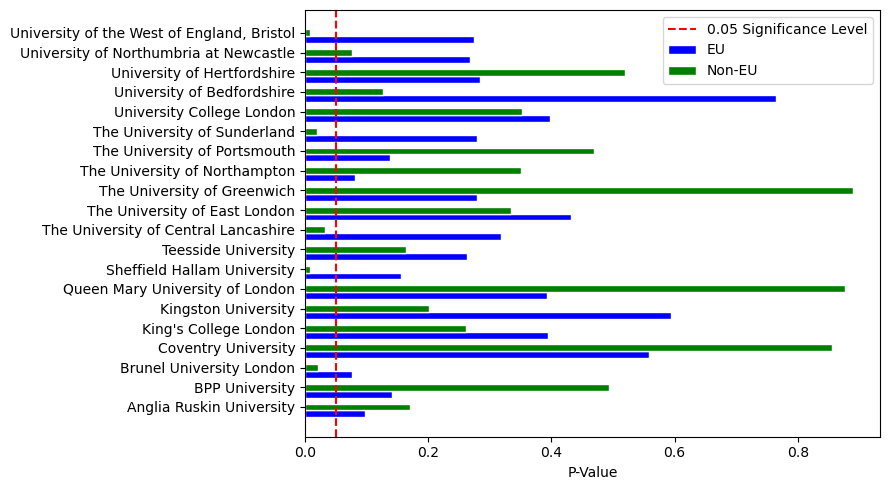

In [16]:
# Import essential libraries
import pandas as pd                                                                  
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# Read the data file
eng_df = pd.read_excel('eng_20 uni.xlsx')                                            
# sorting the relevant columns
pg_eu_cols = eng_df.columns[[1, 3, 5, 7, 9, 11, 13, 15]].tolist()                    
pg_non_eu_cols = eng_df.columns[[2, 4, 6, 8, 10, 12, 14, 16]].tolist()
ug_eu_cols = eng_df.columns[[17, 19, 21, 23, 25, 27, 29, 31]].tolist()
ug_non_eu_cols = eng_df.columns[[18, 20, 22, 24, 26, 28, 30, 32]].tolist()

# separating the columns based on pre and post Brexit years
pre_brexit_pg_eu_cols = pg_eu_cols[:6]                                              
post_brexit_pg_eu_cols = pg_eu_cols[6:]
pre_brexit_pg_non_eu_cols = pg_non_eu_cols[:6]
post_brexit_pg_non_eu_cols = pg_non_eu_cols[6:]
pre_brexit_ug_eu_cols = ug_eu_cols[:6]
post_brexit_ug_eu_cols = ug_eu_cols[6:]
pre_brexit_ug_non_eu_cols = ug_non_eu_cols[:6]
post_brexit_ug_non_eu_cols = ug_non_eu_cols[6:]

# Define function for university-wise t-test analysis
def uni_ttest(df, pre_brexit_cols, post_brexit_cols):
    p_values = []
    unis = []
    for index, row in df.iterrows():
        try:
            pre_brexit_values = row[pre_brexit_cols].astype(float).values
            post_brexit_values = row[post_brexit_cols].astype(float).values
            t_stat, p_value = stats.ttest_ind(pre_brexit_values, post_brexit_values)
            p_values.append(p_value)
            unis.append(row['HE provider'])
        except Exception as e:
            print(f"Skipping {row['HE provider']} due to error: {e}")
    return pd.DataFrame({'HE provider': unis, 'p_value': p_values})
# Define function to plot p-values 
def plot_pvalues_uni(df):
    plt.figure(figsize=(8, 4))
    plt.barh(df['HE provider'].astype(str), df['p_value'], color='black')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 Significance Level')
    plt.xlabel('P-Value')
    plt.legend()
    plt.show()
# university-wise t-tests 
uni_p_values_pre_pg_eu = uni_ttest(eng_df, pre_brexit_pg_eu_cols, post_brexit_pg_eu_cols)
uni_p_values_pre_pg_non_eu = uni_ttest(eng_df, pre_brexit_pg_non_eu_cols, post_brexit_pg_non_eu_cols)
uni_p_values_pre_ug_eu = uni_ttest(eng_df, pre_brexit_ug_eu_cols, post_brexit_ug_eu_cols)
uni_p_values_pre_ug_non_eu = uni_ttest(eng_df, pre_brexit_ug_non_eu_cols, post_brexit_ug_non_eu_cols)

#Plotting p values in two groups
def plot_pvalues(df_eu, df_non_eu):
    # Set position and width for the bars
    bar_width = 0.35
    r1 = np.arange(len(df_eu))
    r2 = [x + bar_width for x in r1]
    # Create bars
    plt.figure(figsize=(9, 5))
    plt.barh(r1, df_eu['p_value'], color='blue', height=bar_width, edgecolor='white', label='EU')
    plt.barh(r2, df_non_eu['p_value'], color='green', height=bar_width, edgecolor='white', label='Non-EU')  
    #Label x-axis
    plt.xlabel('P-Value') 
    # Creating significance level at x=0.05
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 Significance Level')   
    #Define y-axis
    plt.yticks([r + bar_width for r in range(len(df_eu))], df_eu['HE provider'].astype(str))  
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the p-values for PG students for both EU and non-EU
plot_pvalues(uni_p_values_pre_pg_eu, uni_p_values_pre_pg_non_eu)
# Plot the p-values for UG students for both EU and non-EU
plot_pvalues(uni_p_values_pre_ug_eu, uni_p_values_pre_ug_non_eu)


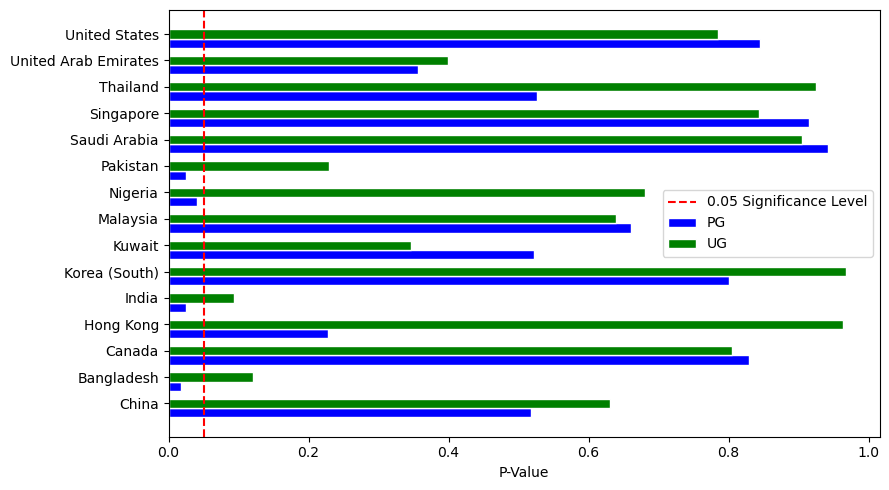

In [3]:
new_df = pd.read_excel('ALL_non_EU.xlsx')
# Define the function for country-wise t-test
def country_ttest(df, pre_brexit_cols, post_brexit_cols):
    p_values = []
    countries = []
    for index, row in df.iterrows():
        try:
            pre_brexit_values = row[pre_brexit_cols].astype(float).values
            post_brexit_values = row[post_brexit_cols].astype(float).values
            t_stat, p_value = stats.ttest_ind(pre_brexit_values, post_brexit_values)
            p_values.append(p_value)
            countries.append(row['Domicile'])
        except Exception as e:
            print(f"Skipping {row['Domicile']} due to error: {e}")
    return pd.DataFrame({'Country': countries, 'p_value': p_values})

                                         # Categorizing columns for PG and UG for the latest dataset
pg_columns = [col for col in new_df.columns if any(substring in col.lower() for substring in ['eng', 'wales', 'scot', 'ni'])]
ug_columns = [col for col in new_df.columns if col.lower().strip().split(' ')[0] in ['e', 'w', 's', 'n']]

#Create dataframes for each category for the latest dataset
df_pg = new_df[['Domicile'] + pg_columns]
df_ug = new_df[['Domicile'] + ug_columns]

#Filter columns based on pre and post Brexit years
pre_brexit_cols = ['2014', '2015', '2016', '2017', '2018', '2019']
post_brexit_cols = ['2020', '2021']

pre_brexit_pg_cols = [col for col in pg_columns if any(year in col for year in pre_brexit_cols)]
post_brexit_pg_cols = [col for col in pg_columns if any(year in col for year in post_brexit_cols)]
pre_brexit_ug_cols = [col for col in ug_columns if any(year in col for year in pre_brexit_cols)]
post_brexit_ug_cols = [col for col in ug_columns if any(year in col for year in post_brexit_cols)]

# Country-wise t-tests
country_p_values_pg = country_ttest(df_pg, pre_brexit_pg_cols, post_brexit_pg_cols)
country_p_values_ug = country_ttest(df_ug, pre_brexit_ug_cols, post_brexit_ug_cols)
def plot_pvalue(df_pg, df_ug):
    # Setting the positions and width for the bars
    bar_width = 0.35
    r1 = np.arange(len(df_pg))
    r2 = [x + bar_width for x in r1]

    # Create bars
    plt.figure(figsize=(9, 5)) 
    plt.barh(r1, df_pg['p_value'], color='blue', height=bar_width, edgecolor='white', label='PG')
    plt.barh(r2, df_ug['p_value'], color='green', height=bar_width, edgecolor='white', label='UG')

    # Label x-axis
    plt.xlabel('P-Value') 
    # Set significance level to 0.05
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 Significance Level') 
    # Label y-axis
    plt.yticks([r + bar_width for r in range(len(df_pg))], df_pg['Country'].astype(str))
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting the p-values for countries comparing PG and UG enrolments (Pre and Post Brexit)
plot_pvalue(country_p_values_pg, country_p_values_ug)


## Visualization of influenced countries

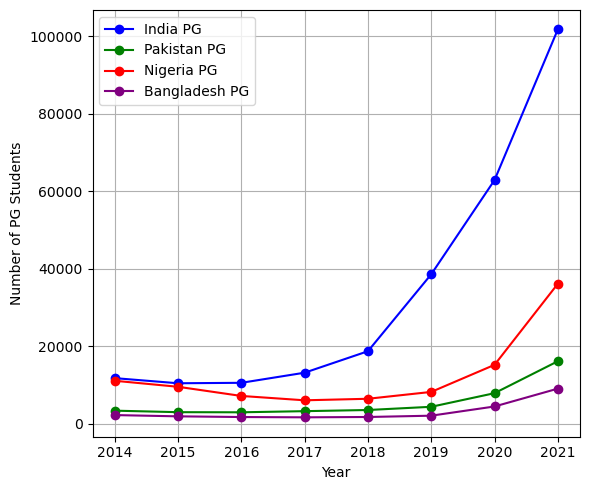

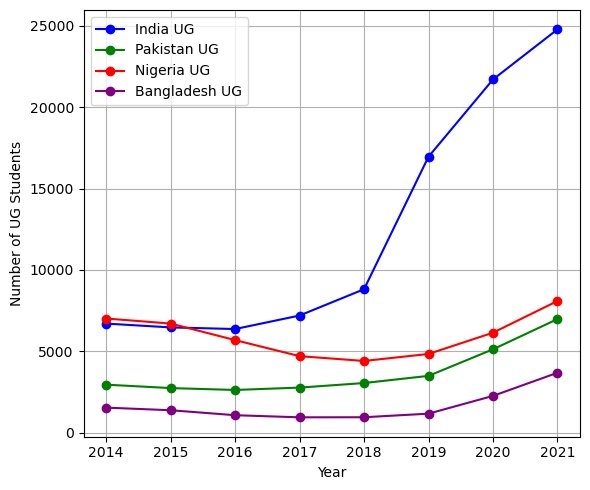

In [5]:
# Load Data file
data = pd.read_excel('ALL_non_EU.xlsx')

# Define the years
years = list(range(2014, 2022))
# Identify pg and ug columns
pg_cols_mapping = {
    year: list(range(start, start+4)) 
    for year, start in zip(range(2014, 2022), range(1, 32, 4))}
ug_cols_mapping = {
    year: list(range(start, start+4)) 
    for year, start in zip(range(2014, 2022), range(33, 64, 4))}

# Define the countries and colors for plotting
countries = ['India', 'Pakistan', 'Nigeria', 'Bangladesh']
colors = {'India': 'blue', 'Pakistan': 'green', 'Nigeria': 'red', 'Bangladesh': 'purple'}
# Sum the columns for each year and category and create a new dataframe
enrolment_data = pd.DataFrame(index=years)
for country in countries:
    country_data = data[data['Domicile'] == country]
    for year in years:
        enrolment_data.loc[year, f'{country}_PG'] = country_data.iloc[:, pg_cols_mapping[year]].sum(axis=1).values[0]
        enrolment_data.loc[year, f'{country}_UG'] = country_data.iloc[:, ug_cols_mapping[year]].sum(axis=1).values[0]

# Plot for PG
plt.figure(figsize=(6,5))
for country, color in colors.items():
    plt.plot(enrolment_data.index, enrolment_data[f'{country}_PG'], marker='o', color=color, label=f'{country} PG')
plt.xlabel('Year')
plt.ylabel('Number of PG Students')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Plot for UG
plt.figure(figsize=(6,5))
for country, color in colors.items():
    plt.plot(enrolment_data.index, enrolment_data[f'{country}_UG'], marker='o', color=color, label=f'{country} UG')

plt.xlabel('Year')
plt.ylabel('Number of UG Students')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

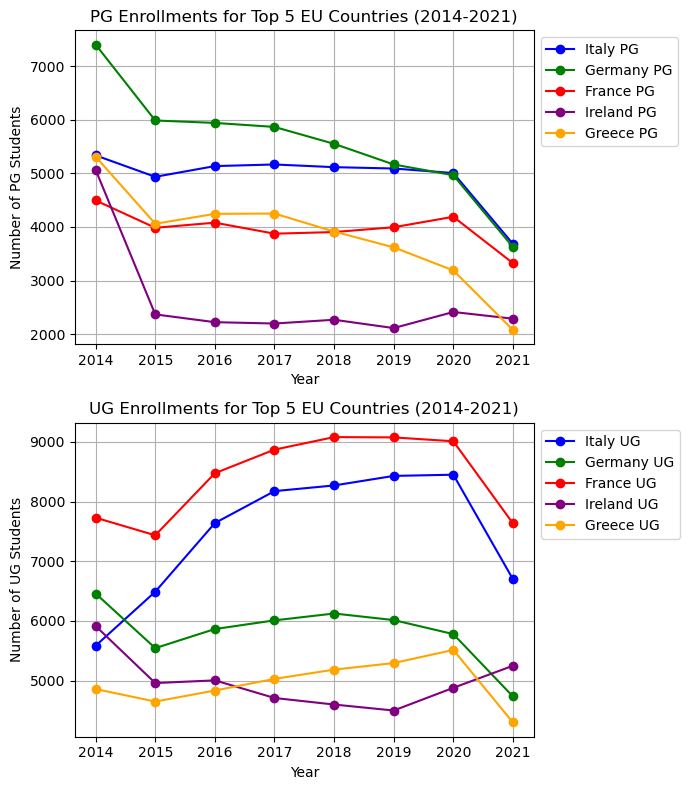

In [6]:
eu_data = pd.read_excel('ALL_EU.xlsx')                          # Load the EU data
years = list(range(2014, 2022))                                 # Define the years
# Define the columns for each year and category
pg_cols_mapping = {
    year: list(range(start, start+4)) 
    for year, start in zip(range(2014, 2022), range(1, 32, 4))}
ug_cols_mapping = {
    year: list(range(start, start+4)) 
    for year, start in zip(range(2014, 2022), range(33, 64, 4))}

# Determine top 5 countries based on the total enrolment for the year 2021 for PG students
top_countries = eu_data.groupby('Domicile').apply(lambda x: x.iloc[:, pg_cols_mapping[2021]].sum(axis=1).values[0]).nlargest(5).index.tolist()
# Updated color mapping
colors = {top_countries[0]: 'blue',top_countries[1]: 'green',top_countries[2]: 'red',top_countries[3]: 'purple',top_countries[4]: 'orange'}

# Extract data for the top 5 countries for both PG and UG
eu_enrolment_data = pd.DataFrame(index=years)
for country in top_countries:
    country_data = eu_data[eu_data['Domicile'] == country]
    for year in years:
        eu_enrolment_data.loc[year, f'{country}_PG'] = country_data.iloc[:, pg_cols_mapping[year]].sum(axis=1).values[0]
        eu_enrolment_data.loc[year, f'{country}_UG'] = country_data.iloc[:, ug_cols_mapping[year]].sum(axis=1).values[0]

# Plotting for PG and UG for top 5 EU countries
fig, axes = plt.subplots(2, 1, figsize=(7,8))
# PG plot
for country, color in colors.items():
    axes[0].plot(eu_enrolment_data.index, eu_enrolment_data[f'{country}_PG'], marker='o', color=color, label=f'{country} PG')
axes[0].set_title('PG Enrollments for Top 5 EU Countries (2014-2021)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of PG Students')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid(True)
# UG plot
for country, color in colors.items():
    axes[1].plot(eu_enrolment_data.index, eu_enrolment_data[f'{country}_UG'], marker='o', color=color, label=f'{country} UG')
axes[1].set_title('UG Enrollments for Top 5 EU Countries (2014-2021)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of UG Students')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Growth trend analysis

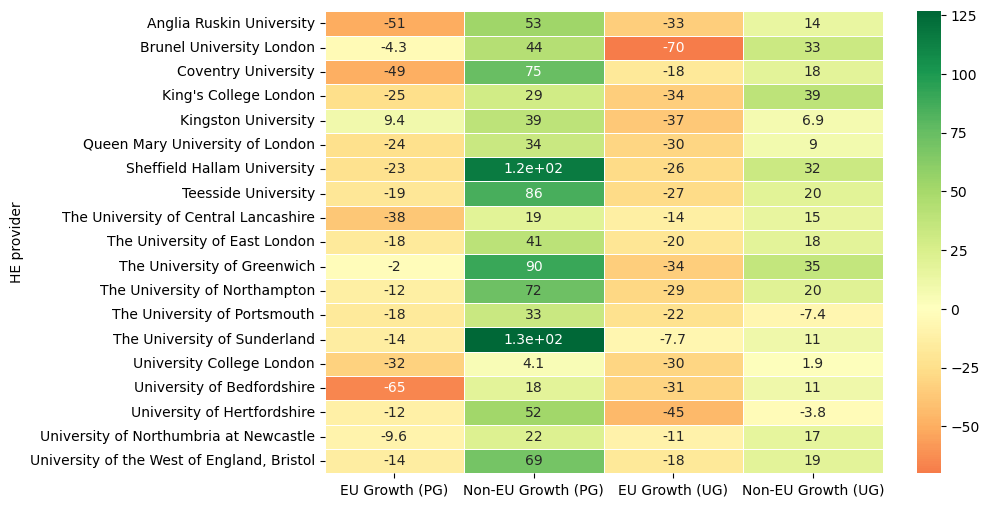

In [7]:
import warnings                                                     #import warnings                                               
warnings.filterwarnings("ignore")                                                                    
file_path_england = 'eng_20 uni.xlsx'                               # Load the dataset for universities in England
data_england = pd.read_excel(file_path_england)

# Filter universities having at least 50 European and Non-European Union students in 2014 for both PG and UG
new_data_eng = data_england[
    (data_england['European Union 2014'] >= 50) & 
    (data_england['Non-European Union 2014'] >= 50) & 
    (data_england['Eu ug 2014'] >= 50) & 
    (data_england['Non-Eu ug 2014'] >= 50)]

# Function to calculate growth rate for given columns
def growth_rate(data, start_column, end_column):
    return (data[end_column] - data[start_column]) / data[start_column] * 100

# Calculate growth rates for PG and UG students from European and Non-European union
new_data_eng['EU Growth (PG)'] = growth_rate(new_data_eng, 'European Union 2020', 'European Union 2021')
new_data_eng['Non-EU Growth (PG)'] = growth_rate(new_data_eng, 'Non-European Union 2020', 'Non-European Union 2021')
new_data_eng['EU Growth (UG)'] = growth_rate(new_data_eng, 'Eu ug 2020', 'Eu ug 2021')
new_data_eng['Non-EU Growth (UG)'] =growth_rate(new_data_eng, 'Non-Eu ug 2020', 'Non-Eu ug 2021')

# Plot the heatmap
import seaborn as sns
def plot_growth(data):
    # Prepare the data in matrix format
    heatmap_data = data[['HE provider', 'EU Growth (PG)', 'Non-EU Growth (PG)', 'EU Growth (UG)', 'Non-EU Growth (UG)']]
    heatmap_data.set_index('HE provider', inplace=True) 
    plt.figure(figsize=(9, 6))
    sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, linewidths=0.5, center=0)
    plt.show()
plot_growth(new_data_eng)


## Linear regression analysis

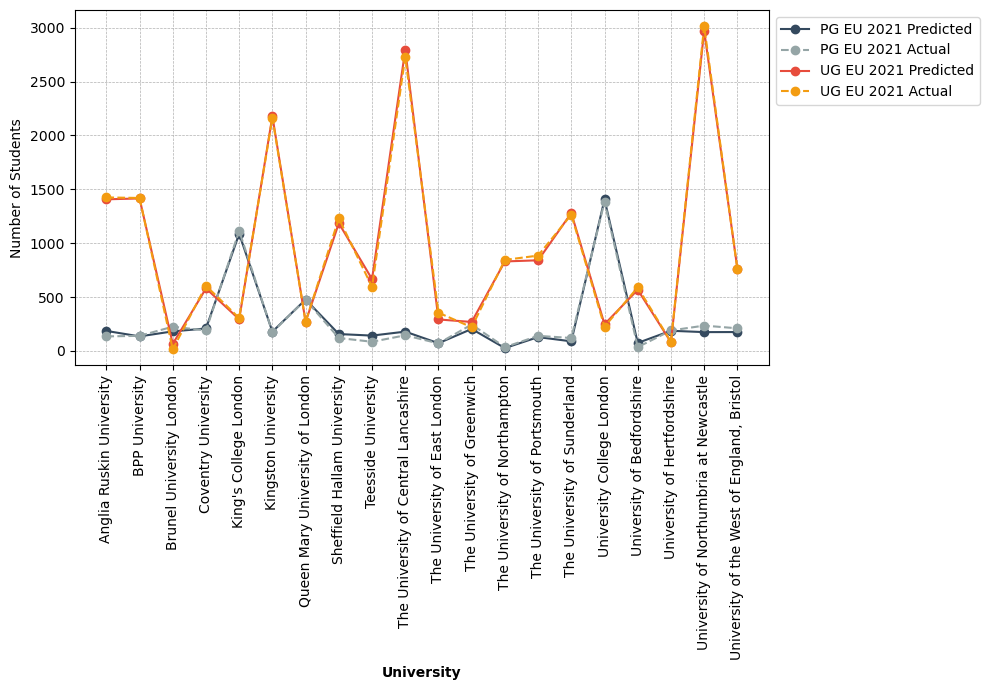

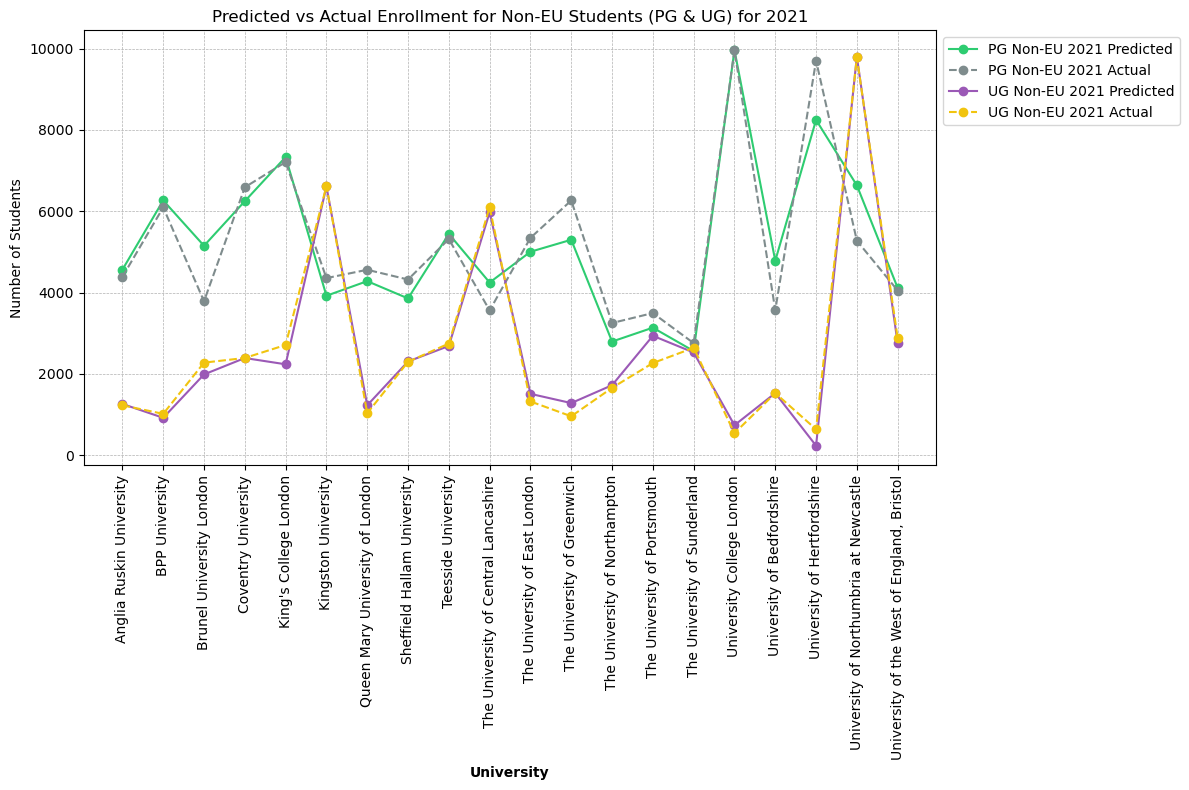

Mean absolute error for Post-graduate prediction: 191.47235013156316

R-squared error for Post-graduate prediction: 0.9590563056464587

Mean absolute error for Under-graduate prediction: 86.36760575905173

R-squared error for Under-graduate prediction: 0.9937294294261125


In [14]:
from sklearn.model_selection import train_test_split    #Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
                                                      
df = pd.read_excel("eng_20 uni.xlsx")                   # Load our dataset
# Separate features (X) and target variable (y) for both PG and UG                                                     
X_train_pg = df.iloc[:, 1:13]                        
y_test_pg = df[['European Union 2020','Non-European Union 2020','European Union 2021','Non-European Union 2021']]

X_train_ug=df.iloc[:, 17:29]
y_test_ug= df[['Eu ug 2020','Non-Eu ug 2020','Eu ug 2021','Non-Eu ug 2021']]

#Predicting PG EU and non-EU enrolment                                                      
regressor_pg = LinearRegression()                       # Create Linear Regression models for non-EU and EU
regressor_ug = LinearRegression()                                          
regressor_pg.fit(X_train_pg, y_test_pg)                 # Fit models to the training data
regressor_ug.fit(X_train_ug, y_test_ug)
                                                 
y_pred_pg = regressor_pg.predict(X_train_pg)            # Predict enrollment for non-EU and EU for the year 2020 and 2021
y_pred_ug = regressor_ug.predict(X_train_ug)
# Print PG predicted and actual values for the years 2020 and 2021 for each university
for idx, university in enumerate(df["HE provider"]):
    pg_eu_2020_pred = y_pred_pg[idx, 0]
    pg_eu_2020_actual = df["European Union 2020"].iloc[idx]
    
    pg_non_eu_2020_pred = y_pred_pg[idx, 1]
    pg_non_eu_2020_actual = df['Non-European Union 2020'].iloc[idx]
    
    pg_eu_2021_pred = y_pred_pg[idx, 2]
    pg_eu_2021_actual = df["European Union 2021"].iloc[idx]
    
    pg_non_eu_2021_pred = y_pred_pg[idx, 3]
    pg_non_eu_2021_actual = df['Non-European Union 2021'].iloc[idx]

# Print UG predicted and actual values for the years 2020 and 2021 for each university
for idx, university in enumerate(df["HE provider"]):
    ug_eu_2020_pred = y_pred_ug[idx, 0]
    ug_eu_2020_actual = df["Eu ug 2020"].iloc[idx]
    
    ug_non_eu_2020_pred = y_pred_ug[idx, 1]
    ug_non_eu_2020_actual = df['Non-Eu ug 2020'].iloc[idx]
    
    ug_eu_2021_pred = y_pred_ug[idx, 2]
    ug_eu_2021_actual = df["Eu ug 2021"].iloc[idx]
    
    ug_non_eu_2021_pred = y_pred_ug[idx, 3]
    ug_non_eu_2021_actual = df['Non-Eu ug 2021'].iloc[idx]

# Prepare the output for PG predictions in table format
pg_data = []
for idx, university in enumerate(df["HE provider"]):
    row = [
        university,
        y_pred_pg[idx, 0], df["European Union 2020"].iloc[idx],
        y_pred_pg[idx, 1], df['Non-European Union 2020'].iloc[idx],
        y_pred_pg[idx, 2], df["European Union 2021"].iloc[idx],
        y_pred_pg[idx, 3], df['Non-European Union 2021'].iloc[idx]  ]
    pg_data.append(row)
pg_columns = [
    "University",
    "EU 2020 Predicted", "EU 2020 Actual","Non-EU 2020 Predicted", "Non-EU 2020 Actual","EU 2021 Predicted",
    "EU 2021 Actual", "Non-EU 2021 Predicted", "Non-EU 2021 Actual"]
pg_df = pd.DataFrame(pg_data, columns=pg_columns)

# Prepare the output for UG predictions in table format
ug_data = []
for idx, university in enumerate(df["HE provider"]):
    row = [
        university,
        y_pred_ug[idx, 0], df["Eu ug 2020"].iloc[idx],
        y_pred_ug[idx, 1], df['Non-Eu ug 2020'].iloc[idx],
        y_pred_ug[idx, 2], df["Eu ug 2021"].iloc[idx],
        y_pred_ug[idx, 3], df['Non-Eu ug 2021'].iloc[idx]  ]
    ug_data.append(row)

ug_columns = [
    "University", "EU 2020 Predicted", "EU 2020 Actual", "Non-EU 2020 Predicted", "Non-EU 2020 Actual",
    "EU 2021 Predicted", "EU 2021 Actual", "Non-EU 2021 Predicted", "Non-EU 2021 Actual"]
ug_df = pd.DataFrame(ug_data, columns=ug_columns)
ug_df_sorted = ug_df.sort_values(by='EU 2021 Predicted', ascending=False).head(10)
pg_df_sorted=pg_df.sort_values(by='EU 2021 Predicted', ascending=False).head(10)
# Convert to integer form
pg_df_sorted_int = pg_df_sorted.astype({col: int for col in pg_df.columns if 'Predicted' in col or 'Actual' in col})
ug_df_sorted_int = ug_df_sorted.astype({col: int for col in ug_df_sorted.columns if 'Predicted' in col or 'Actual' in col})


# Enhanced color palette
colors = {
    'pg_eu_predicted': '#34495e','pg_eu_actual': '#95a5a6','ug_eu_predicted': '#e74c3c','ug_eu_actual': '#f39c12',  
    'pg_non_eu_predicted': '#2ecc71', 'pg_non_eu_actual': '#7f8c8d','ug_non_eu_predicted': '#9b59b6',
    'ug_non_eu_actual': '#f1c40f'       }

#Plot EU student enrolment for both PG and UG (2021)
plt.figure(figsize=(10, 7))
# Line and scatter plots for EU 2021 data for PG and UG enrolment
plt.plot(pg_df["University"], pg_df["EU 2021 Predicted"], color=colors['pg_eu_predicted'], marker='o', label="PG EU 2021 Predicted")
plt.plot(pg_df["University"], pg_df["EU 2021 Actual"], color=colors['pg_eu_actual'], marker='o', linestyle='--', label="PG EU 2021 Actual")
plt.plot(ug_df["University"], ug_df["EU 2021 Predicted"], color=colors['ug_eu_predicted'], marker='o', label="UG EU 2021 Predicted")
plt.plot(ug_df["University"], ug_df["EU 2021 Actual"], color=colors['ug_eu_actual'], marker='o', linestyle='--', label="UG EU 2021 Actual")

# Label x and y axis, add legend
plt.xlabel('University', fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('Number of Students')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot non-EU student enrolment for both PG and UG (2021)
plt.figure(figsize=(12, 8))
# Line and scatter plots for Non-EU 2021 data for PG and UG enrolment
plt.plot(pg_df["University"], pg_df["Non-EU 2021 Predicted"], color=colors['pg_non_eu_predicted'], marker='o', label="PG Non-EU 2021 Predicted")
plt.plot(pg_df["University"], pg_df["Non-EU 2021 Actual"], color=colors['pg_non_eu_actual'], marker='o', linestyle='--', label="PG Non-EU 2021 Actual")
plt.plot(ug_df["University"], ug_df["Non-EU 2021 Predicted"], color=colors['ug_non_eu_predicted'], marker='o', label="UG Non-EU 2021 Predicted")
plt.plot(ug_df["University"], ug_df["Non-EU 2021 Actual"], color=colors['ug_non_eu_actual'], marker='o', linestyle='--', label="UG Non-EU 2021 Actual")

# Label x and y axis, add legend
plt.xlabel('University', fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('Number of Students')
plt.title('Predicted vs Actual Enrollment for Non-EU Students (PG & UG) for 2021')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
#Calculate error for PG predictions
mae_pg = mean_absolute_error(y_test_pg, y_pred_pg)
r2_pg = r2_score(y_test_pg, y_pred_pg)
#Calculate error for UG predictions
mae_ug = mean_absolute_error(y_test_ug, y_pred_ug)
r2_ug = r2_score(y_test_ug, y_pred_ug)

print(f"Mean absolute error for Post-graduate prediction: { mae_pg}")
print(f"\nR-squared error for Post-graduate prediction: { r2_pg}")

print(f"\nMean absolute error for Under-graduate prediction: { mae_ug}")
print(f"\nR-squared error for Under-graduate prediction: { r2_ug}")


In [13]:
ug_df_sorted_int

,University,EU 2020 Predicted,EU 2020 Actual,Non-EU 2020 Predicted,Non-EU 2020 Actual,EU 2021 Predicted,EU 2021 Actual,Non-EU 2021 Predicted,Non-EU 2021 Actual
18,University of Northumbria at Newcastle,3308,3380,8404,8385,2973,3015,9805,9785
9,The University of Central Lancashire,3390,3165,5226,5325,2794,2730,5977,6100
5,Kingston University,3385,3425,6203,6195,2179,2165,6609,6620
1,BPP University,2550,2600,1069,1100,1415,1420,917,1015
0,Anglia Ruskin University,2104,2135,1086,1070,1407,1425,1258,1225
14,The University of Sunderland,1362,1370,2304,2385,1280,1265,2524,2640
7,Sheffield Hallam University,1391,1670,1833,1745,1185,1230,2303,2295
13,The University of Portsmouth,1068,1140,2773,2445,841,885,2935,2265
12,The University of Northampton,1226,1190,1389,1375,830,845,1719,1655
19,"University of the West of England, Bristol",952,925,2372,2420,763,760,2748,2875


In [15]:
pg_df_sorted_int

,University,EU 2020 Predicted,EU 2020 Actual,Non-EU 2020 Predicted,Non-EU 2020 Actual,EU 2021 Predicted,EU 2021 Actual,Non-EU 2021 Predicted,Non-EU 2021 Actual
15,University College London,2036,2035,9494,9565,1406,1385,9964,9960
4,King's College London,1471,1480,5716,5580,1087,1115,7333,7210
6,Queen Mary University of London,627,625,3251,3410,477,475,4280,4560
3,Coventry University,378,375,3824,3765,208,190,6247,6590
11,The University of Greenwich,251,250,3105,3295,203,245,5298,6265
17,University of Hertfordshire,220,215,5740,6395,187,190,8247,9705
0,Anglia Ruskin University,234,275,2761,2870,185,135,4562,4385
2,Brunel University London,220,235,3059,2635,181,225,5150,3785
9,The University of Central Lancashire,226,235,2964,2985,179,145,4245,3560
5,Kingston University,205,160,3267,3125,178,175,3920,4355


## Polynomial regression analysis

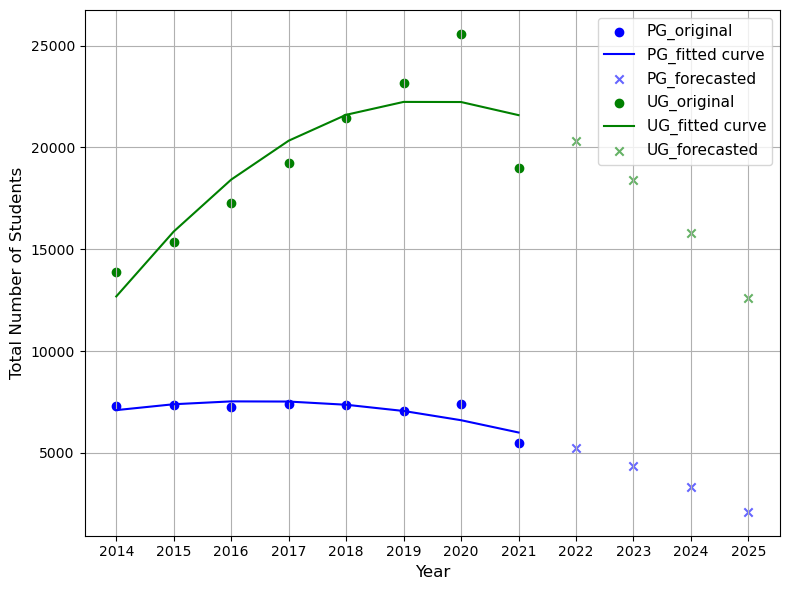

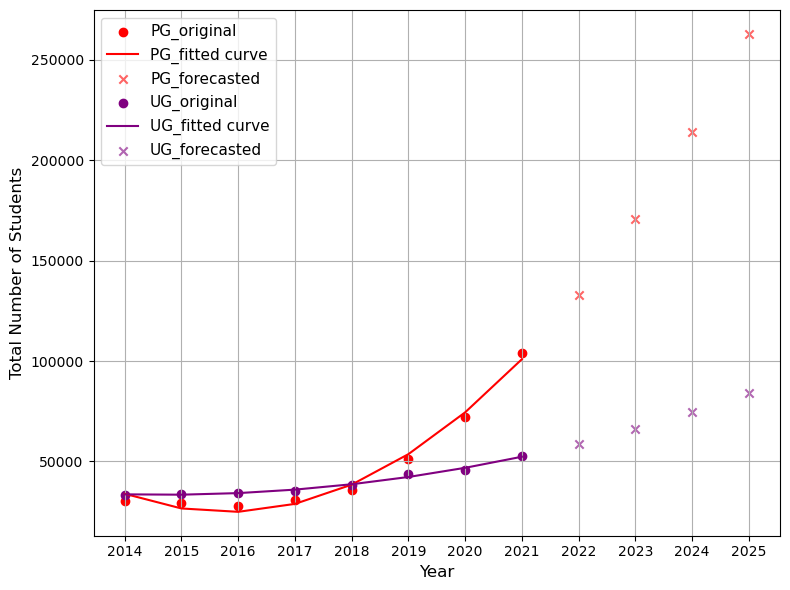

The R-squared error value is calculated for each category as:
 {'European Union': 0.654279129589454, 'Eu ug': 0.7879529808774273, 'Non-European Union': 0.9887911637879016, 'Non-Eu ug': 0.9891010936387822}


In [10]:
import numpy as np                                                  #Import essential libraries                      
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

data_path = 'eng_20 uni.xlsx'                                      # Load the data 
data = pd.read_excel(data_path, index_col=0)

def find_errors(X, y, model):
    y_pred = model.predict(X)
    r_2 = r2_score(y, y_pred)
    return  r_2
# Store the errors and R-squared values for each category
err = {}
# Function to plot EU data with updated legend labels and compute errors
def plot_eu(data, degree=2, steps=4):
    fig, ax = plt.subplots(figsize=(8, 6)) 
    # Define colors
    colors = ['blue', 'green'] 
    # Add legend labels
    labels = ["PG_original", "PG_fitted curve", "PG_forecasted", "UG_original", "UG_fitted curve", "UG_forecasted"]  
    # Loop through each EU category, PG and UG
    for idx, category in enumerate(['European Union', 'Eu ug']):
        category_columns = [f"{category} {year}" for year in range(2014, 2022)]
        category_data = data[category_columns]
        summed_values = category_data.sum()
        #Select the feature X and target variable y
        X = np.array(range(len(summed_values))).reshape(-1, 1)
        y = summed_values.values
        # Create a Polynomial Regression model
        polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polyreg.fit(X, y)
        # Find errors
        r_2 = find_errors(X, y, polyreg)
        err[category] = ( r_2)  
        X_future = np.array(range(len(summed_values), len(summed_values) + steps)).reshape(-1, 1)
        forecast = polyreg.predict(X_future)
        forecast = np.maximum(0, forecast)
        
        # Plot the output
        ax.scatter(range(2014, 2022), y, label=labels[idx*3], marker='o', color=colors[idx])
        ax.plot(range(2014, 2022), polyreg.predict(X), label=labels[idx*3 + 1], color=colors[idx])
        ax.scatter(range(2022, 2022 + steps), forecast, label=labels[idx*3 + 2], marker='x', color=colors[idx], alpha=0.6)
    #Add labels and legend
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Number of Students',fontsize=12)
    ax.set_xticks(range(2014, 2026))
    ax.legend(fontsize=11)
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
# Function to plot non-EU data with updated legend labels and compute errors
def plot_non_eu(data, degree=2, steps=4):
    fig, ax = plt.subplots(figsize=(8, 6)) 
    # Define colors
    colors = ['red', 'purple']
    # Add legend labels
    labels = ["PG_original", "PG_fitted curve", "PG_forecasted", "UG_original", "UG_fitted curve", "UG_forecasted"] 
    # Loop through each non-EU category, PG and UG)
    for idx, category in enumerate(['Non-European Union', 'Non-Eu ug']):
        category_columns = [f"{category} {year}" for year in range(2014, 2022)]
        category_data = data[category_columns]
        summed_values = category_data.sum()
        X = np.array(range(len(summed_values))).reshape(-1, 1)
        y = summed_values.values  
        # Create a Polynomial Regression model
        polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        polyreg.fit(X, y)
        # Find errors
        r_2 = find_errors(X, y, polyreg)
        err[category] = (r_2)
        X_future = np.array(range(len(summed_values), len(summed_values) + steps)).reshape(-1, 1)
        forecast = polyreg.predict(X_future)
        forecast = np.maximum(0, forecast)
        
        # Plot the output
        ax.scatter(range(2014, 2022), y, label=labels[idx*3], marker='o', color=colors[idx])
        ax.plot(range(2014, 2022), polyreg.predict(X), label=labels[idx*3 + 1], color=colors[idx])
        ax.scatter(range(2022, 2022 + steps), forecast, label=labels[idx*3 + 2], marker='x', color=colors[idx], alpha=0.6)       
    # Add labels and legend
    ax.set_xlabel('Year',fontsize=12)
    ax.set_ylabel('Total Number of Students',fontsize=12)
    ax.set_xticks(range(2014, 2026))
    ax.legend(fontsize=11)
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
# Run the updated functions with customized legends
plot_eu(data)
plot_non_eu(data)

print("The R-squared error value is calculated for each category as:\n", err)

## Exponential smoothing analysis

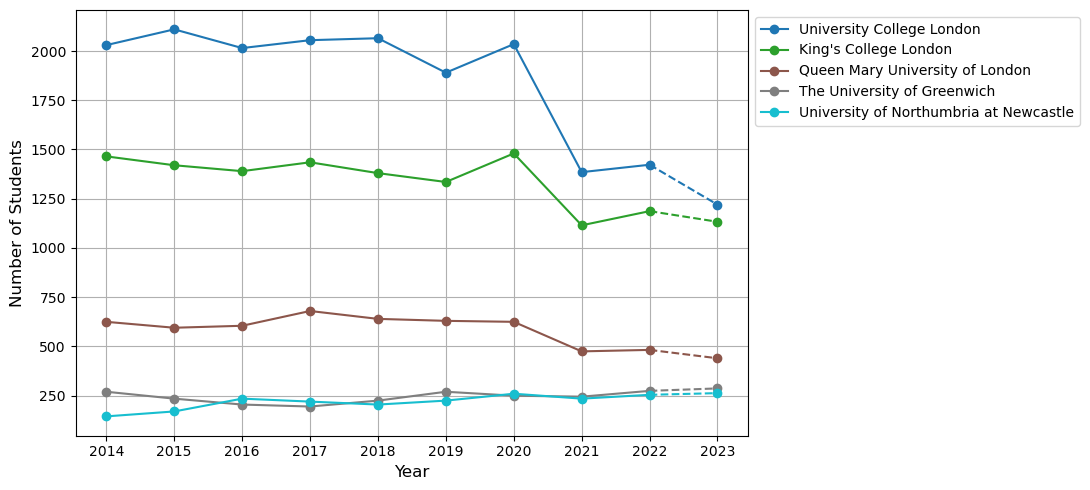

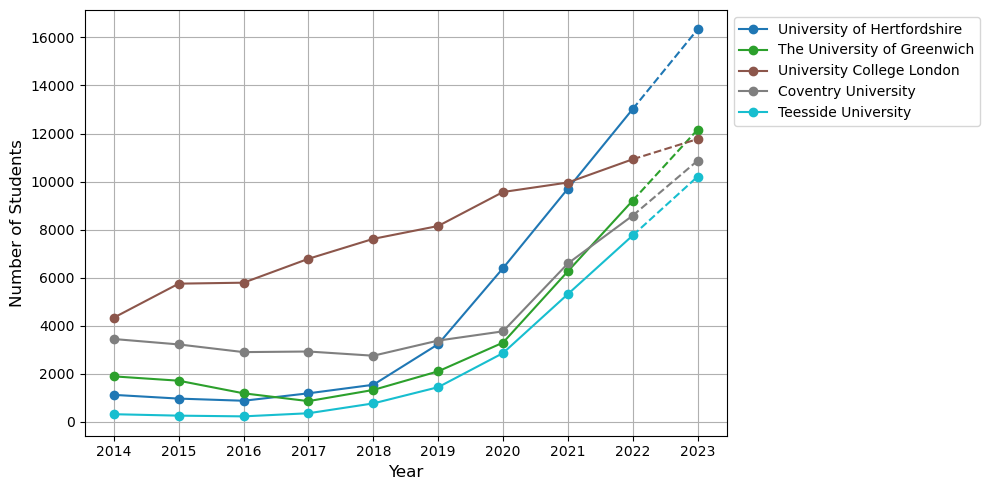

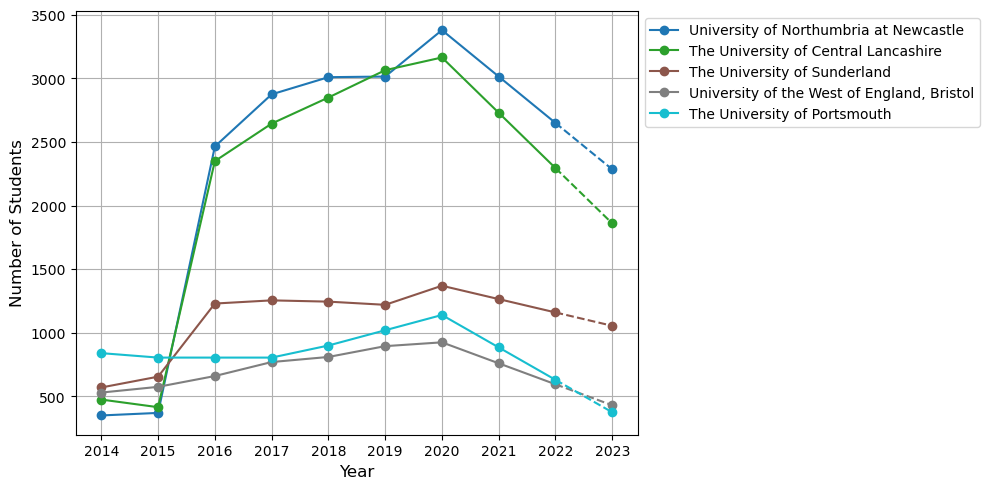

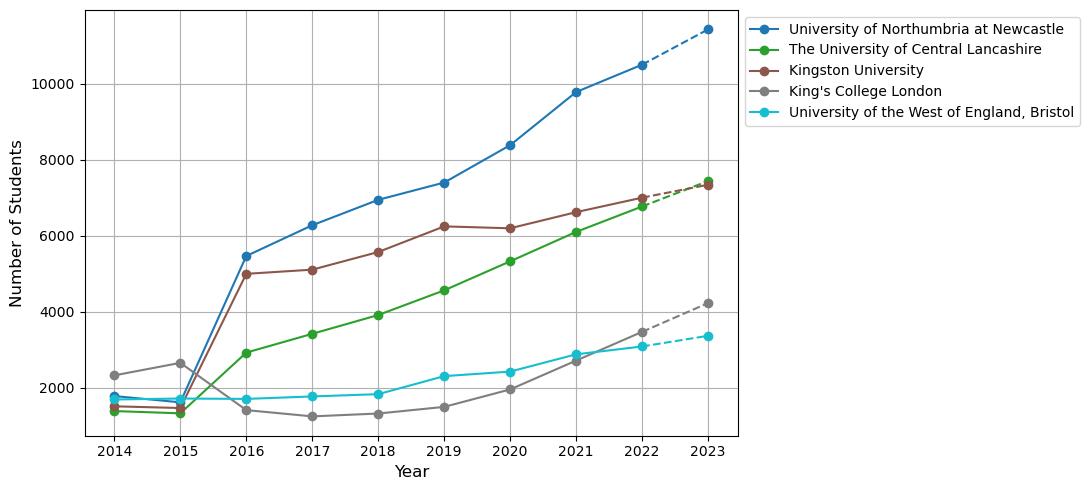

In [12]:
import pandas as pd                                               #Import essential libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

file_path = 'eng_20 uni.xlsx'                                     # Load the data
data = pd.read_excel(file_path)

# Make 'HE provider' column as the index for the data
data.set_index('HE provider', inplace=True)
# Consider the training columns as data from 2017 and 2021
train_columns = [f'European Union {year}' for year in range(2017, 2022)]
train_data = data[train_columns]

def fit_model(row):
    model = ExponentialSmoothing(row, trend='add')
    fit_model = model.fit()
    return fit_model
# Fit the Holt's Linear Exponential Smoothing model for each university's training data
holt_models = train_data.apply(fit_model, axis=1)
def predict_values(model, steps=2):                               # Forecast next years, 2022 and 2023
    forecast = model.forecast(steps=steps)
    return pd.Series(forecast.values)
# Create an empty DataFrame to store the predictions for 2022 and 2023
predictions_df = pd.DataFrame(columns=[f'Predicted European Union {year}' for year in range(2022, 2024)])
# Predict and store the values using the model
for university, model in zip(train_data.index, holt_models):
    prediction = predict_values(model)
    predictions_df.loc[university] = prediction.values

# Compare the predicted values with the actual values by merging the data 
merged_df = data[['European Union 2020', 'European Union 2021']].join(predictions_df)
# Select the top 10 universities based on the predictions for 2023
top_10_uni = merged_df.sort_values(by='Predicted European Union 2023', ascending=False).head(10)

# Display the relevant columns
top_10_uni[['European Union 2020', 'European Union 2021', 'Predicted European Union 2022', 'Predicted European Union 2023']]
import matplotlib.pyplot as plt
import numpy as np

# Plot the data for top 5 universities
plt.figure(figsize=(11, 5))
# Add a color palette
color_palette = plt.cm.tab10(np.linspace(0, 1, 5))
# Iterating over the top 5 universities
for idx, university in enumerate(top_10_uni.index[:5]):
    # Plotting actual data from 2014 to 2021
    plt.plot(range(2014, 2022), data.loc[university, [f'European Union {year}' for year in range(2014, 2022)]], 
             color=color_palette[idx], marker='o', label=university) 
    # Extending the 2021 line to the 2022 point
    plt.plot([2021, 2022], [data.loc[university, 'European Union 2021'], top_10_uni.loc[university, 'Predicted European Union 2022']], 
             color=color_palette[idx], linestyle='-')
    # Plotting predicted data for 2022 and 2023
    plt.plot(range(2022, 2024), top_10_uni.loc[university, [f'Predicted European Union {year}' for year in range(2022, 2024)]], 
             color=color_palette[idx], linestyle='--', marker='o')

plt.xlabel('Year',  fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(list(range(2014, 2024)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Consider the training columns as data from 2017 and 2021
train_columns = [f'Non-European Union {year}' for year in range(2017, 2022)]
train_data = data[train_columns]

def fit_model(row):
    model = ExponentialSmoothing(row, trend='add')
    fit_model = model.fit()
    return fit_model
# Fit the Holt's Linear Exponential Smoothing model for each university's training data
holt_models = train_data.apply(fit_model, axis=1)

def predict_values(model, steps=2):                   # Forecast next 2 years 2022 and 2023
    forecast = model.forecast(steps=steps)
    return pd.Series(forecast.values)
# Create an empty DataFrame to store the predictions for 2022 and 2023
predictions_df = pd.DataFrame(columns=[f'Predicted Non-European Union {year}' for year in range(2022, 2024)])
# Predict and store the values using the fitted Holt's Linear Exponential Smoothing models
for university, model in zip(train_data.index, holt_models):
    prediction = predict_values(model)
    predictions_df.loc[university] = prediction.values
# Compare the predicted values with the actual values by merging the data 
merged_df = data[['Non-European Union 2020', 'Non-European Union 2021']].join(predictions_df)
# Select the top 10 universities based on the predictions for 2023
top_10_uni = merged_df.sort_values(by='Predicted Non-European Union 2023', ascending=False).head(10)

# Display the relevant columns
top_10_uni[['Non-European Union 2020', 'Non-European Union 2021', 'Predicted Non-European Union 2022', 'Predicted Non-European Union 2023']]
# Plot the data for top 5 universities
plt.figure(figsize=(10, 5))
# Add a color palette
color_palette = plt.cm.tab10(np.linspace(0, 1, 5))
# Iterating over the top 5 universities
for idx, university in enumerate(top_10_uni.index[:5]):
    # Plotting actual data from 2014 to 2021
    plt.plot(range(2014, 2022), data.loc[university, [f'Non-European Union {year}' for year in range(2014, 2022)]], 
             color=color_palette[idx], marker='o', label=university)
    # Extending the 2021 line to the 2022 point
    plt.plot([2021, 2022], [data.loc[university, 'Non-European Union 2021'], top_10_uni.loc[university, 'Predicted Non-European Union 2022']], 
             color=color_palette[idx], linestyle='-')
    # Plotting predicted data for 2022 and 2023
    plt.plot(range(2022, 2024), top_10_uni.loc[university, [f'Predicted Non-European Union {year}' for year in range(2022, 2024)]], 
             color=color_palette[idx], linestyle='--', marker='o')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(list(range(2014, 2024)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Consider the training columns to include only data for 2020 and 2021
train_columns = [f'Eu ug {year}' for year in range(2020, 2022)]
train_data = data[train_columns]

def fit_model(row):
    model = ExponentialSmoothing(row, trend='add')
    fit_model = model.fit()
    return fit_model

# Fit the Holt's Linear Exponential Smoothing model for each university's training data
holt_models = train_data.apply(fit_model, axis=1)
def predict_values(model, steps=2):                         # Forecast next 2 years, 2022 and 2023
    forecast = model.forecast(steps=steps)
    return pd.Series(forecast.values)
# Create an empty DataFrame to store the predictions for 2022 and 2023
predictions_df = pd.DataFrame(columns=[f'Predicted EU {year}' for year in range(2022, 2024)])
# Predict and store the values using the model
for university, model in zip(train_data.index, holt_models):
    prediction = predict_values(model)
    predictions_df.loc[university] = prediction.values
# Rename columns as specified
data = data.rename(columns={'Eu ug 2020': 'EU 2020', 'Eu ug 2021': 'EU 2021'})
# Compare the predicted values with the actual values by merging the data
merged_df = data[['EU 2020', 'EU 2021']].join(predictions_df)
# Select the top 10 universities based on the predictions for 2023
top_10_uni = merged_df.sort_values(by='Predicted EU 2023', ascending=False).head(10)

# Display the relevant columns
top_10_uni[['EU 2020', 'EU 2021', 'Predicted EU 2022', 'Predicted EU 2023']]
# Plot the data for top 5 universities
plt.figure(figsize=(10, 5))
# Add a color palette
color_palette = plt.cm.tab10(np.linspace(0, 1, 5))
# Iterating over the top 5 universities
for idx, university in enumerate(top_10_uni.index[:5]):
    # Plotting actual data from 2014 to 2021
    years_2014_to_2021 = [f'Eu ug {year}' if year < 2020 else f'EU {year}' for year in range(2014, 2022)]
    plt.plot(range(2014, 2022), data.loc[university, years_2014_to_2021], 
             color=color_palette[idx], marker='o', label=university) 
    # Extending the 2021 line to the 2022 point
    plt.plot([2021, 2022], [data.loc[university, 'EU 2021'], top_10_uni.loc[university, 'Predicted EU 2022']], 
             color=color_palette[idx], linestyle='-')  
    # Plotting predicted data for 2022 and 2023
    plt.plot(range(2022, 2024), top_10_uni.loc[university, [f'Predicted EU {year}' for year in range(2022, 2024)]], 
             color=color_palette[idx], linestyle='--', marker='o')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(list(range(2014, 2024)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Consider the training columns as data from 2017 and 2021
train_columns = [f'Non-Eu ug {year}' for year in range(2017, 2022)]
train_data = data[train_columns]

def fit_model(row):
    model = ExponentialSmoothing(row, trend='add')
    fit_model = model.fit()
    return fit_model
# Fit the Holt's Linear Exponential Smoothing model for each university's training data
holt_models = train_data.apply(fit_model, axis=1)
def predict_values(model, steps=2):                             # Forecast only 2 years (2022 and 2023)
    forecast = model.forecast(steps=steps)
    return pd.Series(forecast.values)

# Create an empty DataFrame to store the predictions for 2022 and 2023
predictions_df = pd.DataFrame(columns=[f'Predicted Non-EU {year}' for year in range(2022, 2024)])
# Predict and store the values using the this model
for university, model in zip(train_data.index, holt_models):
    prediction = predict_values(model)
    predictions_df.loc[university] = prediction.values
# Merge the predicted values with the actual values for comparison
merged_df = data[['Non-Eu ug 2020', 'Non-Eu ug 2021']].join(predictions_df)
# Select the top 10 universities based on the predictions for 2023
top_10_uni = merged_df.sort_values(by='Predicted Non-EU 2023', ascending=False).head(10)
# Display the relevant columns
top_10_uni[['Non-Eu ug 2020', 'Non-Eu ug 2021', 'Predicted Non-EU 2022', 'Predicted Non-EU 2023']]

# Plot the data for top 5 universities
plt.figure(figsize=(11, 5))
# Add a color palette 
color_palette = plt.cm.tab10(np.linspace(0, 1, 5))
# Iterating over the top 5 universities
for idx, university in enumerate(top_10_uni.index[:5]):
    # Plotting actual data from 2014 to 2021
    plt.plot(range(2014, 2022), data.loc[university, [f'Non-Eu ug {year}' for year in range(2014, 2022)]], 
             color=color_palette[idx], marker='o', label=university)  
    # Extending the 2021 line to the 2022 point
    plt.plot([2021, 2022], [data.loc[university, 'Non-Eu ug 2021'], top_10_uni.loc[university, 'Predicted Non-EU 2022']], 
             color=color_palette[idx], linestyle='-')  
    # Plotting predicted data for 2022 and 2023
    plt.plot(range(2022, 2024), top_10_uni.loc[university, [f'Predicted Non-EU {year}' for year in range(2022, 2024)]], 
             color=color_palette[idx], linestyle='--', marker='o')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(list(range(2014, 2024)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
